In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Lung_Cancer_dataset.csv")

# Inspect dataset
print(df.head())
print(df.info())
print(df.isnull().sum())


     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB
None
Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [3]:
# Handle missing values (fill numerical with median)
num_cols = ['Age', 'Smokes', 'AreaQ', 'Alkhol']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop irrelevant columns
df = df.drop(['Name', 'Surname'], axis=1)

# Separate features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete!")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Preprocessing complete!
Training set shape: (47, 4)
Test set shape: (12, 4)


In [4]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Evaluation Metrics:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-Score : 1.00

Confusion Matrix:
[[6 0]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



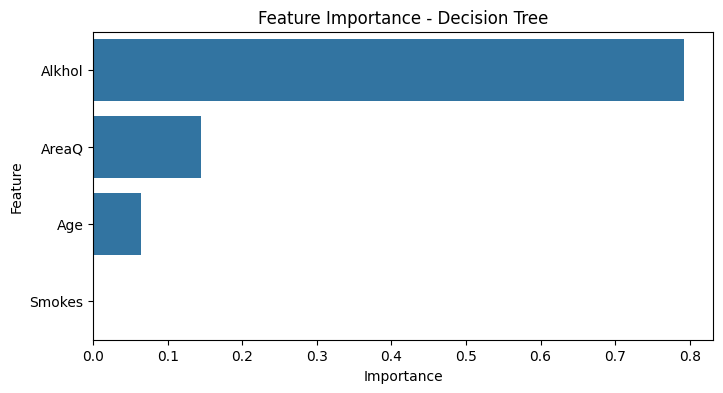

In [5]:
# Feature importance
importances = dt_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Decision Tree")
plt.show()


In [6]:
# Apply PCA (retain ≥95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Reduced features after PCA: {X_train_pca.shape[1]}")

# Retrain Decision Tree on PCA-transformed data
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = dt_model_pca.predict(X_test_pca)

# Evaluate
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print("\nDecision Tree after PCA Evaluation Metrics:")
print(f"Accuracy : {accuracy_pca:.2f}")
print(f"Precision: {precision_pca:.2f}")
print(f"Recall   : {recall_pca:.2f}")
print(f"F1-Score : {f1_pca:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_pca)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))


Original features: 4
Reduced features after PCA: 4

Decision Tree after PCA Evaluation Metrics:
Accuracy : 0.92
Precision: 0.86
Recall   : 1.00
F1-Score : 0.92

Confusion Matrix:
[[5 1]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [7]:
# Comparison table
import pandas as pd

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline DT': [accuracy, precision, recall, f1],
    'DT with PCA': [accuracy_pca, precision_pca, recall_pca, f1_pca]
})

print("Performance Comparison:")
print(comparison)


Performance Comparison:
      Metric  Baseline DT  DT with PCA
0   Accuracy          1.0     0.916667
1  Precision          1.0     0.857143
2     Recall          1.0     1.000000
3   F1-Score          1.0     0.923077
